Dataset: “bankruptcy” and “diamonds” (The simulation data are processed by the Assignment – 1)

You are kindly required to process the above datasets by the following clustering algorithms, including

1) Flat – K-Means and Fuzzy C-Means Clustering Algorithms

2) Single Linkage, Complete Linkage, and Average Linkage Clustering Algorithms

 

Deliverable: 

1) A complete cluster analysis for each clustering algorithm (as far as possible)

2) Codes in a PDF file

 

FYI & Hint:

a) How to computationally find the optimal value of K or C? (by which method?)

b) As the above datasets are classification and regression problems, we already had a discussion in the lecture about how to transfer these problems to the clustering problem, or inverse.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("diamonds(predict price).csv")
data

,Unnamed: 0,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,NaN,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,1,2,0.21,Premium,E,SI1,59.8,NaN,326.0,3.89,3.84,2.31
2,2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,3,4,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
4,4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,53937,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    52947 non-null  float64
 1   cut      52951 non-null  object 
 2   color    52948 non-null  object 
 3   clarity  52945 non-null  object 
 4   depth    52950 non-null  float64
 5   table    52947 non-null  float64
 6   price    52948 non-null  float64
 7   x        52949 non-null  float64
 8   y        52943 non-null  float64
 9   z        52948 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [9]:
data.isnull().sum()

carat      993
cut        989
color      992
clarity    995
depth      990
table      993
price      992
x          991
y          997
z          992
dtype: int64

In [16]:
data.describe()

,carat,depth,table,price,x,y,z
count,52947.000000,52950.000000,52947.000000,52948.000000,52949.000000,52943.000000,52948.000000
mean,0.797645,61.751209,57.457393,3933.716382,5.731839,5.734215,3.538151
std,0.473748,1.434124,2.234371,3988.643890,1.121952,1.142757,0.705764
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.250000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [53]:
columns_categorical = ["cut", "color", "clarity"]
columns_numeric = ["carat", "depth", "table", "x", "y", "z", "price"]

for i in columns_categorical:
    print(data[i].value_counts())
    print("-"*40)


Ideal        21141
Premium      13539
Very Good    11871
Good          4820
Fair          1580
Name: cut, dtype: int64
----------------------------------------
G    11083
E     9592
F     9369
H     8159
D     6659
I     5333
J     2753
Name: color, dtype: int64
----------------------------------------
SI1     12834
VS2     12028
SI2      9022
VS1      8019
VVS2     4967
VVS1     3591
IF       1757
I1        727
Name: clarity, dtype: int64
----------------------------------------


In [46]:
data["cut"].mode()

0    Ideal
dtype: object

In [2]:
data["cut"] = data["cut"].fillna(data["cut"].mode())
data["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

**<br>數值型資料內都有離群值且偏斜,所以空值row刪去不補值</br>**
**類別型資料僅cut有眾數，用眾數補cut空值，其餘空值row刪去不補值**
**<br>Since outliers and skewsness exist in all numeric columns, dropna instead of fillna to make sure our model is correct.</br>**
**Since the values of categorical columns are likely even, except the 'cut' column, we fill the cut 'na' with mode and dropna in other cat_columns.**

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44774 entries, 0 to 53938
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    44774 non-null  int64  
 1   Unnamed: 0.1  44774 non-null  int64  
 2   carat         44774 non-null  float64
 3   cut           44774 non-null  object 
 4   color         44774 non-null  object 
 5   clarity       44774 non-null  object 
 6   depth         44774 non-null  float64
 7   table         44774 non-null  float64
 8   price         44774 non-null  float64
 9   x             44774 non-null  float64
 10  y             44774 non-null  float64
 11  z             44774 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.4+ MB


In [4]:
# Feature之前，將類別型資料 Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_columns = ["cut", "color", "clarity"]
for i in categorical_columns:
    data[i] = labelencoder.fit_transform(data[i])
data

C:\Users\User\.conda\envs\env_name\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
2,2,3,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
4,4,5,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
5,5,6,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
6,6,7,0.24,4,5,6,62.3,57.0,336.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...
53934,53934,53935,0.72,3,0,2,62.7,59.0,2757.0,5.69,5.73,3.58
53935,53935,53936,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,53937,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,53938,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56


**特徵選取**

In [ ]:
cluster之前的特徵降維: feature selection

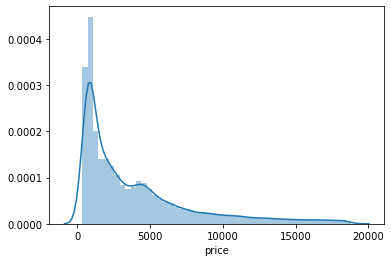

In [5]:
# train_test Split

X = data.drop(['price',"Unnamed: 0","Unnamed: 0.1"], axis=1) # Drop single-value column
y = data['price']


import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

sns.distplot(data["price"]) #出圖
plt.show()

In [54]:
data.corr()

,Unnamed: 0,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,1.000000,1.000000,-0.378333,-0.025661,-0.092815,0.114674,-0.034064,-0.102718,-0.306415,-0.405458,-0.394377,-0.398144
Unnamed: 0.1,1.000000,1.000000,-0.378333,-0.025661,-0.092815,0.114674,-0.034064,-0.102718,-0.306415,-0.405458,-0.394377,-0.398144
carat,-0.378333,-0.378333,1.000000,0.016624,0.272595,-0.201297,0.026202,0.181124,0.921035,0.974790,0.948355,0.951110
cut,-0.025661,-0.025661,0.016624,1.000000,-0.000046,0.025503,-0.183754,0.137662,0.038910,0.021354,0.026223,0.001995
color,-0.092815,-0.092815,0.272595,-0.000046,1.000000,-0.024705,0.043015,0.022812,0.160046,0.252826,0.245722,0.250151
clarity,0.114674,0.114674,-0.201297,0.025503,-0.024705,1.000000,-0.049751,-0.081745,-0.067307,-0.211940,-0.203552,-0.210010
depth,-0.034064,-0.034064,0.026202,-0.183754,0.043015,-0.049751,1.000000,-0.296000,-0.013516,-0.026768,-0.030812,0.093781
table,-0.102718,-0.102718,0.181124,0.137662,0.022812,-0.081745,-0.296000,1.000000,0.125987,0.194408,0.182134,0.149490
price,-0.306415,-0.306415,0.921035,0.038910,0.160046,-0.067307,-0.013516,0.125987,1.000000,0.883625,0.861883,0.858550
x,-0.405458,-0.405458,0.974790,0.021354,0.252826,-0.211940,-0.026768,0.194408,0.883625,1.000000,0.971427,0.968667


In [6]:
# feature selection : SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=2,
                                        direction='forward').fit(X, y)

feature_names = np.array(X.columns)
print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")

Features selected by forward sequential selection: ['carat' 'x']


In [16]:
# 套入模型前先ENN
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours 

enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
# X_res.shape >>> (46,9)

Resampled dataset shape Counter({886.0: 6, 544.0: 4, 698.0: 4, 2898.0: 4, 489.0: 3, 601.0: 3, 789.0: 3, 1043.0: 3, 665.0: 2, 1192.0: 2, 326.0: 1, 422.0: 1, 505.0: 1, 530.0: 1, 575.0: 1, 628.0: 1, 840.0: 1, 844.0: 1, 891.0: 1, 926.0: 1, 945.0: 1, 3759.0: 1})


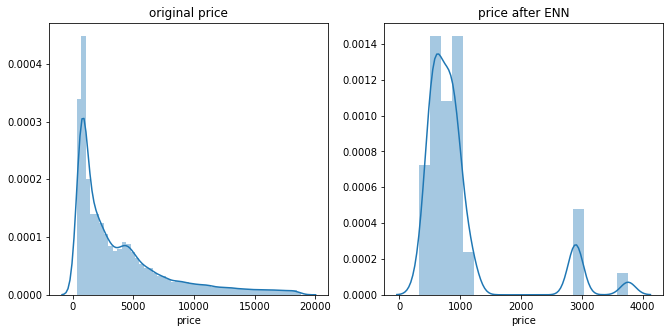

In [42]:
# ENN之前和之後的 price 分布
plt.subplots(1,2,figsize = (11,5))
plt.subplot(121)
sns.distplot(y)
plt.title("original price")

plt.subplot(122)
sns.distplot(y_res) 
plt.title("price after ENN")

plt.show()

**K-Means**

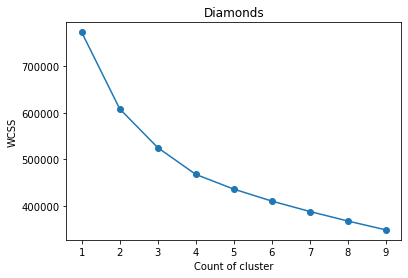

In [43]:
# 手肘法
from sklearn.cluster import KMeans
wcss = []

for each in range(1,10):
    kmeans = KMeans(n_clusters = each)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss,'-o')
plt.xlabel("Count of cluster")
plt.ylabel("WCSS")
plt.title("Diamonds")
plt.show()

In [28]:
# 對原始資料 做 K means
kmeans = KMeans(n_clusters=2, random_state=10).fit(X)
kmeans.labels_
y_pred_kmeans = kmeans.predict(X)

#對ENN縮減過後的資料作Kmeans
kmeans = KMeans(n_clusters=2, random_state=10).fit(X_res)
kmeans.labels_
y_res_pred_kmeans = kmeans.predict(X_res)


Text(0.5, 1.0, 'price Kmeans')

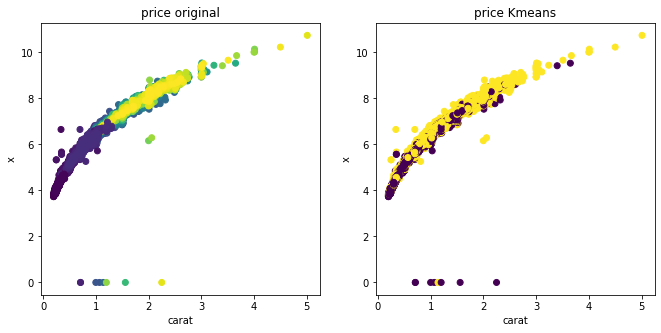

In [45]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

plt.subplots(1, 2, figsize=(11,5))
plt.subplot(121)
plt.scatter(X["carat"], X["x"], c=y)
plt.xlabel("carat")
plt.ylabel("x")
plt.title("price original")

plt.subplot(122)
plt.scatter(X["carat"], X["x"], c=y_pred_kmeans)
plt.xlabel("carat")
plt.ylabel("x")
plt.title("price Kmeans")

In [ ]:
plt.subplots(1, 2, figsize=(11,5))
plt.subplot(121)
plt.scatter(X["carat"], X["x"], c=y_pred_kmeans)
plt.xlabel("carat")
plt.ylabel("x")
plt.title("price Kmeans")

plt.subplot(122)
plt.scatter(X_res["carat"], X_res["x"], c=y_res_pred_kmeans)
plt.xlabel("carat")
plt.ylabel("x")
plt.title("price_ENN Kmeans")

**Fuzzy C Means**

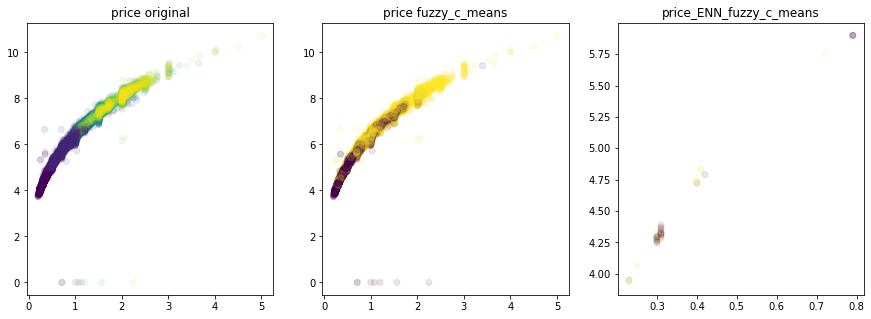

In [47]:
%matplotlib inline
import numpy as np
from fcmeans import FCM

# 對原始資料套fuzzy c means
fcm = FCM(n_clusters=2)
fcm.fit(X)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# 對ENN 降採樣後的資料套 fuzzy c means
fcm = FCM(n_clusters=2)
fcm.fit(X_res)
# outputs
fcm_centers = fcm.centers
fcm_res_labels = fcm.predict(X_res)

# plot result

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.scatter(X["carat"], X["x"], c=y, alpha=.1)
plt.title("price original")

plt.subplot(132)
plt.scatter(X["carat"], X["x"], c=fcm_labels, alpha=.1)
plt.title("price fuzzy_c_means")

plt.subplot(133)
plt.scatter(X_res["carat"], X_res["x"], c=fcm_res_labels, alpha=.1)
plt.title("price_ENN_fuzzy_c_means")

plt.show()

**Single Linkage, Complete Linkage, and Average Linkage Clustering Algorithms**

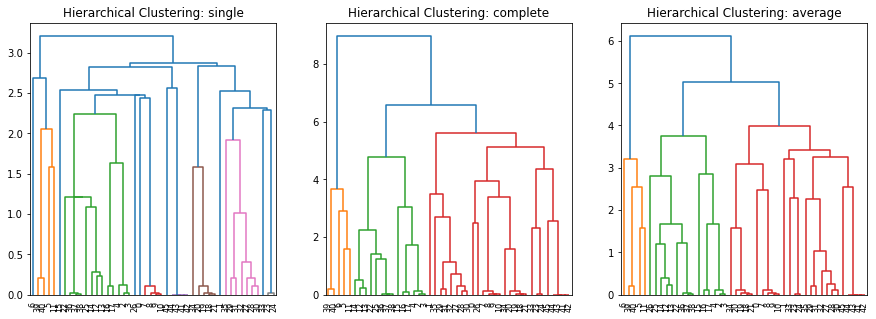

In [39]:
import scipy.cluster.hierarchy as sch
#用原始資料跑太久，直接用ENN後的小樣本套模型
# metric: 距離的計算方式
# method: 群與群之間的計算方式，”single”, “complete”, “average”, “weighted”, “centroid”, “median”, “ward”
dis_single =sch.linkage(X_res,metric='euclidean',method='single')
dis_complete =sch.linkage(X_res,metric='euclidean',method='complete')
dis_average =sch.linkage(X_res,metric='euclidean',method='average')

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
sch.dendrogram(dis_single)
plt.title('Hierarchical Clustering: single')

plt.subplot(132)
sch.dendrogram(dis_complete)
plt.title('Hierarchical Clustering: complete')

plt.subplot(133)
sch.dendrogram(dis_average)
plt.title('Hierarchical Clustering: average')

plt.show()